<a href="https://colab.research.google.com/github/mashalshaikh95/Dana-Analysis-Assignment/blob/main/PDA_summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1: INSTALL RELEVANT LIBRARIES:**

First step is to install all the relevant libaries into the google colab environment which will perform the required tasks.




In [ ]:
!pip install pdfquery
!pip install pandas
!pip install tabula-py
!pip install pypdf


import pandas as pd
import numpy as np
import seaborn as sns
import tabula
from matplotlib import pyplot as plt
import unittest


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.7 MB/s eta 0:00:00
  Created wheel for pdfquery: filename=pdfquery-0.4.3-py3-none-any.whl size=16780 sha256=865e74cd08a0a2f61db6eab5f0cab5fa778e8ba39e269132c63ec9dfee65ef72
  Stored in directory: /root/.cache/pip/wheels/98/a2/41/ca6652543d0fa5762560eaaf0f620a5d6341ec0b9e60996d16
Successfully built pdfquery
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 6.2 MB/s eta 0:00:00


# **STEP 2: EXTRACT, TRANSFORM & LOAD DATA (ETL)**




First we will extract the excel file data. Pandas library is been imported for this purpose and read_excel function is called to load the excel file. First few lines are been called to check if the correct data is loaded.

In [ ]:
# read the excel file
df1=pd.read_excel("/content/APEX Loan Data.xlsx")

# check the first 5 records
print(df1.head())

# check if all the data is being fetched
print("total number of rows: ",len(df1))

# the original file contains 248 records (indexed from 1 to 248) and our dataframe has 247 records (indexed from 0 to 247), which means all the data is being correctly fetched from the excel file.


   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
4     2297       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
4             2500            20000.0         103               333   

   Credit_History  Property_Area Loan_Status  
0               1              3           Y  
1               0              2           N  
2               0      

Now we will load the second data which is in pdf format. Also, we will convert the data from pdf to excel in order to maintain consistency between the datasets and performs operations easily. Tabula library is being imported for both tasks.

In [ ]:
# read data from pdf file
data = tabula.read_pdf("/content/APEX_Loans_Database_Table.pdf", pages='all')

#check if all data is feteched
print(data)

#convert to excel file
tabula.convert_into("/content/APEX_Loans_Database_Table.pdf", "final_data.csv", output_format="csv", pages='all')
print(data)
data1 = pd.read_csv("final_data.csv")
df2 = pd.DataFrame(data1)
df2.to_excel('outputfile.xlsx', sheet_name='Sheet1', index=True)

# check the first five rows
print(df2.head())

# check if all the rows are converted correctly
print("total number of rows", len(df2))

# original  total rows are 399 (indexed from 1 to 399) and in our dataframe the rows are 398 (indexed from 0 to 398), which means all the data is fetched correctly



[    Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0      1002       1        0           0         1              0   
1      1003       1        1           1         1              0   
2      1005       1        1           0         1              1   
3      1006       1        1           0         0              0   
4      1008       1        0           0         1              0   
5      1011       1        1           2         1              1   
6      1013       1        1           0         0              0   
7      1014       1        1           3         1              0   
8      1018       1        1           2         1              0   
9      1020       1        1           1         1              0   
10     1024       1        1           2         1              0   
11     1027       1        1           2         1              0   
12     1028       1        1           2         1              0   
13     1029       1        0     

Now as both dataframes has both datasets, we will merge both datasets into one so that we can perform our operations. The name of first dataframe with 247 rows is df1 and the second dataframe with 398 rows is df2.

In [ ]:
# list all the dataframes to be combined
dataframes=[df1, df2]

# combine to one dataframe
final_df=pd.concat(dataframes)

# check if its fine
print(final_df.head())

# calculate total number of rows after combining
print("total number of rows in final dataframe is", len(final_df), "which is correct because 247 + 398 = 645")

   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
4     2297       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
4             2500            20000.0         103               333   

   Credit_History  Property_Area Loan_Status  
0               1              3           Y  
1               0              2           N  
2               0      

Now as all the data is being correctly extracted from sources, we will see for any inconsistency among variables/columns. If found, we will transform the data into a correct format. It seems that Loan_Status is Y and N which is not in correct format so we will transform Y=1 and N=0, we are using replace function of pandas for this purpose


In [ ]:
# load data to check
final_df.head()

final_df = final_df.replace({'Loan_Status': {'Y': 1, 'N': 0}})

final_df.head()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 0 to 397
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            645 non-null    int64  
 1   Gender             645 non-null    int64  
 2   Married            645 non-null    int64  
 3   Dependents         645 non-null    int64  
 4   Graduate           645 non-null    int64  
 5   Self_Employed      645 non-null    int64  
 6   ApplicantIncome    645 non-null    int64  
 7   CoapplicantIncome  645 non-null    float64
 8   LoanAmount         645 non-null    int64  
 9   Loan_Amount_Term   645 non-null    int64  
 10  Credit_History     645 non-null    int64  
 11  Property_Area      645 non-null    int64  
 12  Loan_Status        645 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 70.5 KB


# **STEP 3: CLEAN THE DATA**

Now we will move towards data cleaning. For this specific dataset, following steps for data cleaning will be followed:

1. Dealing with missing values
2. Removing duplicate values
3. Filter out outliers

1. Dealing with missing values: First check if we have any missing value in a dataset

In [ ]:
#first check if we have null values in entire dataframe
print(final_df.isnull().sum().sum())

# 0 means no NAN or missing value in dataframe

0


It seems we dont have any missing value, so proceed to next step

2. Removing duplicate values:
We will remove duplicate values in the dataframe. We will use dropduplicates() function for this purpose

In [ ]:
# first check if duplicate data exists
duplicateRows = final_df[final_df.duplicated(keep='last')]
print(duplicateRows)
# three duplicates are found

# removing duplicates
final_df=final_df.drop_duplicates()



    Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
22     1925       2        0           0         1              1   
29     1945       2        0           0         1              0   
34     1955       2        0           0         1              0   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
22             2600             1717.0          99               300   
29             5417                0.0         143               480   
34             5000             2541.0         151               480   

    Credit_History  Property_Area  Loan_Status  
22               1              2            0  
29               0              1            0  
34               1              3            0  


3. Removing Outliers:
Outliers are the datapoints that are abnormally different from the dataset. They needs to get deleted to ensure the clean data. We will use boxplot to visualize the outliers and will use interquartile range (IQR) method to remove outliers. The columns we will analyze will be 4 as rest of the columns are 0s and 1s.

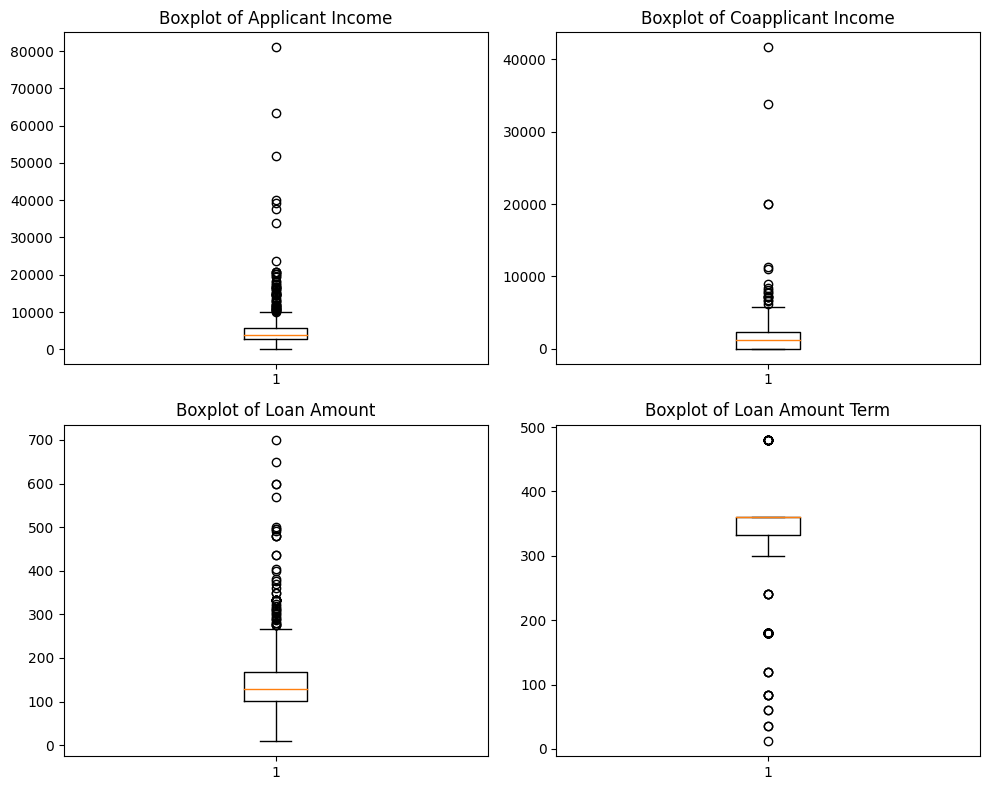

In [ ]:

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot boxplots
axs[0, 0].boxplot(final_df['ApplicantIncome'])
axs[0, 0].set_title('Boxplot of Applicant Income')

axs[0, 1].boxplot(final_df['CoapplicantIncome'])
axs[0, 1].set_title('Boxplot of Coapplicant Income')

axs[1, 0].boxplot(final_df['LoanAmount'])
axs[1, 0].set_title('Boxplot of Loan Amount')

axs[1, 1].boxplot(final_df['Loan_Amount_Term'])
axs[1, 1].set_title('Boxplot of Loan Amount Term')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

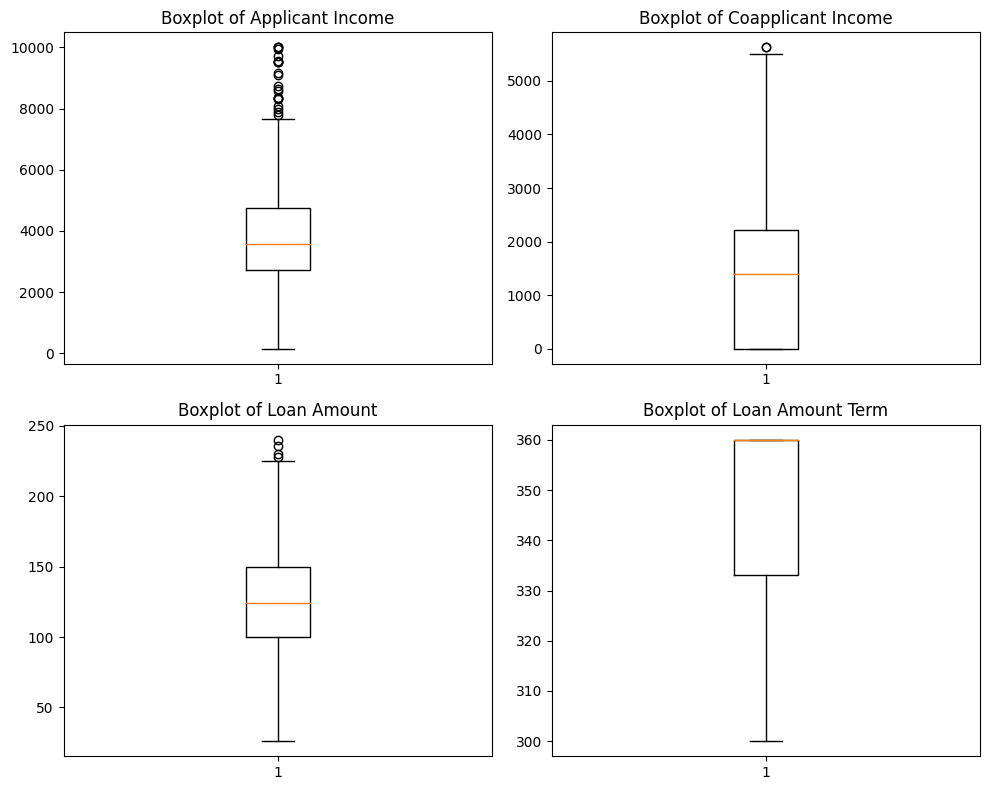

In [ ]:
# Function to remove outliers using IQR method for specific columns
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Columns from which we want to remove outliers
columns_to_process = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Remove outliers from specific columns
cleaned_df = remove_outliers(final_df, columns_to_process)


# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot boxplots
axs[0, 0].boxplot(cleaned_df['ApplicantIncome'])
axs[0, 0].set_title('Boxplot of Applicant Income')

axs[0, 1].boxplot(cleaned_df['CoapplicantIncome'])
axs[0, 1].set_title('Boxplot of Coapplicant Income')

axs[1, 0].boxplot(cleaned_df['LoanAmount'])
axs[1, 0].set_title('Boxplot of Loan Amount')

axs[1, 1].boxplot(cleaned_df['Loan_Amount_Term'])
axs[1, 1].set_title('Boxplot of Loan Amount Term')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



# **STEP 4: EXPLORATORY DATA ANALYSIS (EDA)**

---



We will do the basic EDA using python built-in functions

In [ ]:
#Basic information

cleaned_df.info()

#Describe the data

cleaned_df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 0 to 397
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            473 non-null    int64  
 1   Gender             473 non-null    int64  
 2   Married            473 non-null    int64  
 3   Dependents         473 non-null    int64  
 4   Graduate           473 non-null    int64  
 5   Self_Employed      473 non-null    int64  
 6   ApplicantIncome    473 non-null    int64  
 7   CoapplicantIncome  473 non-null    float64
 8   LoanAmount         473 non-null    int64  
 9   Loan_Amount_Term   473 non-null    int64  
 10  Credit_History     473 non-null    int64  
 11  Property_Area      473 non-null    int64  
 12  Loan_Status        473 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 51.7 KB


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,473.000000,473.000000,473.000000,473.00000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,1972.289641,1.196617,0.640592,0.67019,0.767442,0.109937,3960.120507,1335.735983,125.412262,349.141649,0.780127,2.021142,0.720930
std,549.773218,0.397861,0.480335,0.96830,0.422910,0.313142,1764.597843,1372.189285,39.752055,14.751006,0.414599,0.780847,0.449017
min,1002.000000,1.000000,0.000000,0.00000,0.000000,0.000000,150.000000,0.000000,26.000000,300.000000,0.000000,1.000000,0.000000
25%,1541.000000,1.000000,0.000000,0.00000,1.000000,0.000000,2726.000000,0.000000,100.000000,333.000000,1.000000,1.000000,0.000000
50%,1949.000000,1.000000,1.000000,0.00000,1.000000,0.000000,3588.000000,1387.000000,124.000000,360.000000,1.000000,2.000000,1.000000
75%,2408.000000,1.000000,1.000000,1.00000,1.000000,0.000000,4735.000000,2210.000000,150.000000,360.000000,1.000000,3.000000,1.000000
max,2990.000000,2.000000,1.000000,3.00000,1.000000,1.000000,10000.000000,5625.000000,240.000000,360.000000,1.000000,3.000000,1.000000


1. The total amount loaned by AFS.

The total amount loaned by AFS 59320


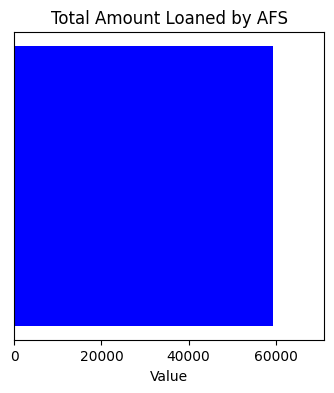

In [ ]:
f=final_df.copy()
final_df.head()

# we are using sum function for this purpose
total_loan= cleaned_df['LoanAmount'].sum()
print("The total amount loaned by AFS",total_loan)

# Plotting the value
plt.figure(figsize=(4, 4))  # Adjust figure size as needed
plt.barh(0, total_loan, color='blue')  # Horizontal bar plot
plt.xlim(0, total_loan * 1.2)  # Adjust x-axis limit for better visualization
plt.yticks([])  # Remove y-axis ticks
plt.xlabel('Value')  # X-axis label
plt.title('Total Amount Loaned by AFS')  # Plot title
plt.show()



2. The average amount loaned.

The average amount loaned: 125.41


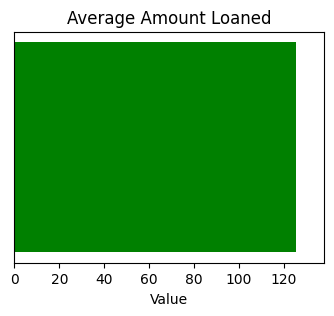

In [ ]:
# we are using mean function for this purpose as it will give average amount
avg_loan= cleaned_df['LoanAmount'].mean()
print("The average amount loaned:",round(avg_loan,2))

# Plotting the value
plt.figure(figsize=(4, 3))  # Adjust figure size as needed
plt.barh(0, avg_loan, color='green')  # Horizontal bar plot
plt.xlim(0, avg_loan * 1.1)  # Adjust x-axis limit for better visualization
plt.yticks([])  # Remove y-axis ticks
plt.xlabel('Value')  # X-axis label
plt.title('Average Amount Loaned')  # Plot title
plt.show()

3. The average loan term.

The average loan term: 334.44


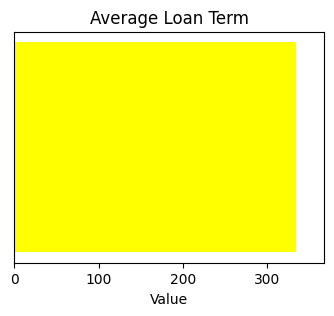

In [ ]:
# we are using mean function for this purpose as it will give average loan term
avg_loan_term= final_df['Loan_Amount_Term'].mean()
print("The average loan term:",round(avg_loan_term,2))

# Plotting the value
plt.figure(figsize=(4, 3))  # Adjust figure size as needed
plt.barh(0, avg_loan_term, color='yellow')  # Horizontal bar plot
plt.xlim(0, avg_loan_term * 1.1)  # Adjust x-axis limit for better visualization
plt.yticks([])  # Remove y-axis ticks
plt.xlabel('Value')  # X-axis label
plt.title('Average Loan Term')  # Plot title
plt.show()

The total number of applicants broken down into Approved and Rejected, the
number of males and female in each case, and shown in an appropriate chart.

We will create a pie chart which will show the distribution of approved and rejected application

Total Number of Applicants & Applications: 473
Total number of Approved Applications: 341
Total number of Rejected Applications: 132


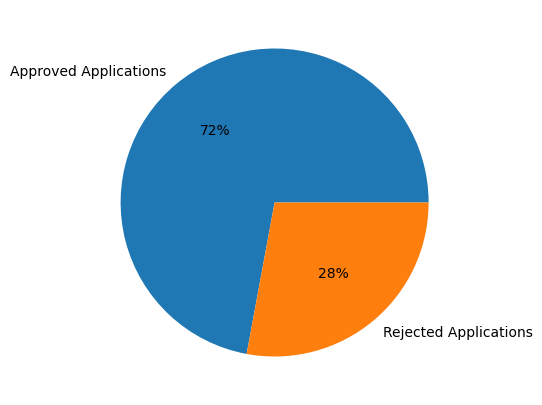

In [ ]:
print("Total Number of Applicants & Applications:",len(cleaned_df['Gender']))

# calculate total number of Approved Applications
approve=cleaned_df.loc[cleaned_df['Loan_Status']==1]
print("Total number of Approved Applications:",len(approve))
# calculate total number of Rejected Applications
reject=cleaned_df.loc[cleaned_df['Loan_Status']==0]
print("Total number of Rejected Applications:",len(reject))

# build a pie chart to broke down applications in Approved & Disapproved
status=['Approved Applications','Rejected Applications']
data=[len(approve),len(reject)]
fig = plt.figure(figsize=(5, 5))
plt.pie(data, labels=status,autopct='%.0f%%')
# show plot
plt.show()


Now we will analysis the number of males and females in each case of approved and rejected applications. We are using bar chart for this purpose

Total Number of Males: 380
Total Number of Females: 93
Total Number of Males in Approved Applications: 278
Total Number of Females in Approved Applications: 63
Total Number of Males in Rejected Applications: 102
Total Number of Females in Rejected Applications: 30


Text(0.5, 1.0, 'Distribution of female and male applicants between approved & rejected application')

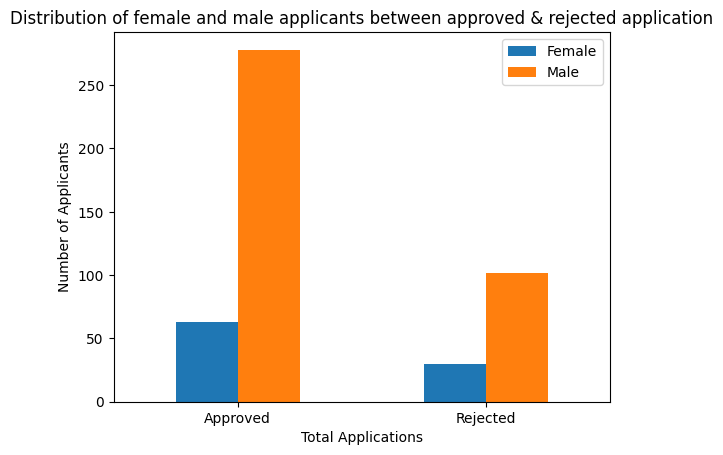

In [ ]:
# calculate number of males, as it is represented as Gender=1
number_of_males= cleaned_df.loc[cleaned_df['Gender']==1]
print("Total Number of Males:",len(number_of_males))

# calculate number of females as it is represented as Gender=2
number_of_females=cleaned_df.loc[cleaned_df['Gender']==2]
print("Total Number of Females:",len(number_of_females))

# now calculate number of males in Approved Applications
number_of_males_in_approved= cleaned_df.loc[(cleaned_df['Gender']==1 )& (cleaned_df['Loan_Status']==1)]
print("Total Number of Males in Approved Applications:",len(number_of_males_in_approved))

# now calculate number of females in Approved Applications
number_of_females_in_approved= cleaned_df.loc[(cleaned_df['Gender']==2 )& (cleaned_df['Loan_Status']==1)]
print("Total Number of Females in Approved Applications:",len(number_of_females_in_approved))

# now calculate number of males in Rejected Applications
number_of_males_in_rejected= cleaned_df.loc[(cleaned_df['Gender']==1 )& (cleaned_df['Loan_Status']==0)]
print("Total Number of Males in Rejected Applications:",len(number_of_males_in_rejected))

# now calculate number of males in Rejected Applications
number_of_females_in_rejected= cleaned_df.loc[(cleaned_df['Gender']==2 )& (cleaned_df['Loan_Status']==0)]
print("Total Number of Females in Rejected Applications:",len(number_of_females_in_rejected))

# now create bar chart
female = [len(number_of_females_in_approved),len(number_of_females_in_rejected)]
male = [len(number_of_males_in_approved),len(number_of_males_in_rejected)]
index = ['Approved', 'Rejected']
df = pd.DataFrame({'Female': female,
                   'Male': male}, index=index)
ax = df.plot.bar(rot=0)
ax.set_ylabel('Number of Applicants')
ax.set_xlabel('Total Applications')
ax.set_title('Distribution of female and male applicants between approved & rejected application')


3. The maximum and minimum of amounts loaned and shown in an appropriate chart.


Maximum amount loaned 700
Maximum amount loaned 26


Text(0.5, 1.0, 'Maximum & Minimum Amounts Loaned')

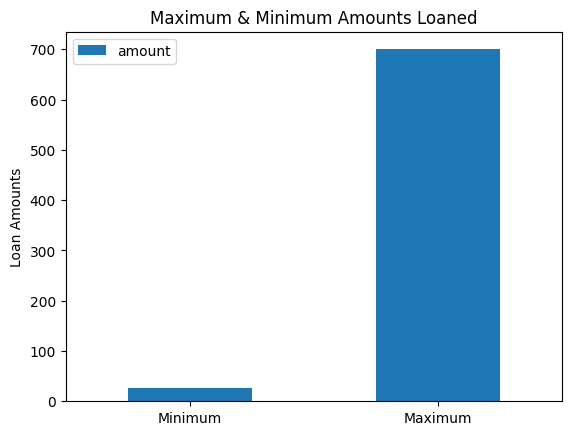

In [ ]:

# calculate max
max_loan= final_df['LoanAmount'].max()
print("Maximum amount loaned",max_loan)

# calculate min
min_loan= cleaned_df['LoanAmount'].min()
print("Maximum amount loaned",min_loan)


data = [min_loan, max_loan]
index = ['Minimum', 'Maximum']
df = pd.DataFrame({'amount': data}, index=index)
ax = df.plot.bar(rot=0)
ax.set_ylabel('Loan Amounts')
ax.set_title('Maximum & Minimum Amounts Loaned')




4. The number of self-employed who had their loan approved, expressed as a
percentage of all who had their loan approved, and shown in an appropriate chart.

Number of self-employed who got loan approved 36
Number of all others who got loan approved 341


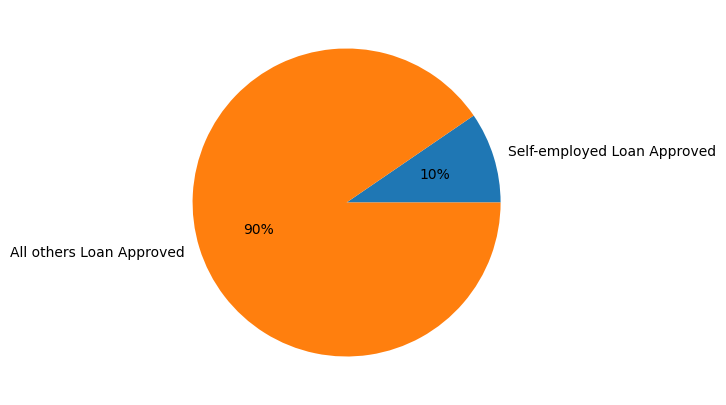

In [ ]:
self_approve= cleaned_df.loc[(cleaned_df['Self_Employed']==1 )& (cleaned_df['Loan_Status']==1)]
all_approve= cleaned_df.loc[(cleaned_df['Loan_Status']==1)]

print("Number of self-employed who got loan approved", len(self_approve))
print("Number of all others who got loan approved", len(all_approve))

points=['Self-employed Loan Approved','All others Loan Approved']
ticks=[len(self_approve),len(all_approve)]
fig = plt.figure(figsize=(5, 5))
plt.pie(ticks, labels=points,autopct='%.0f%%')
# show plot
plt.show()



4. The income distribution of all main applicants, showing average and standard
deviation




Average income 3960.12
Minimum income 150
Maximum income 10000
Standard deviation of income 1764.6


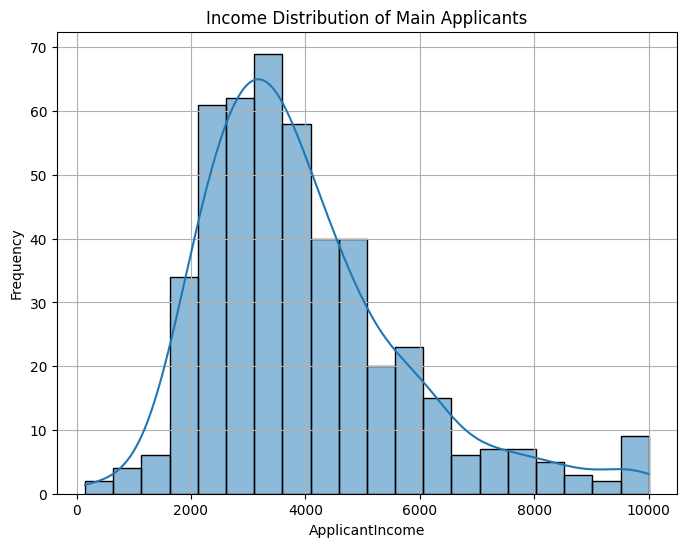

In [ ]:

# calculate average income
avg_income=cleaned_df['ApplicantIncome'].mean()
print("Average income", round(avg_income,2))

# calculate minimum income
min_income=cleaned_df['ApplicantIncome'].min()
print("Minimum income", round(min_income,2))

max_income=cleaned_df['ApplicantIncome'].max()
print("Maximum income", round(max_income,2))

# calculate standard deviation
std_income=cleaned_df['ApplicantIncome'].std()
print("Standard deviation of income", round(std_income,2))


column_name = cleaned_df['ApplicantIncome']
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.histplot(data=cleaned_df, x=column_name, kde=True)  # Histogram with kernel density estimation
#plt.xlabel(column_name)  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Income Distribution of Main Applicants')  # Plot title
plt.grid(True)  # Add grid for better visualization
plt.show()



5. The top ten applicants by loan amount

     Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
148     1519       2        0           0         1              0   
319     2050       1        1           1         1              1   
210     1708       2        0           0         1              0   
231     2945       1        1           0         1              1   
246     1814       1        1           2         1              0   
25      1066       1        1           0         1              1   
157     1543       1        1           1         1              0   
289     1935       1        0           0         1              0   
25      1935       1        0           0         1              0   
390     2255       1        0           3         1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
148            10000             1666.0         225               360   
319            10000                0.0         155               360   
210       

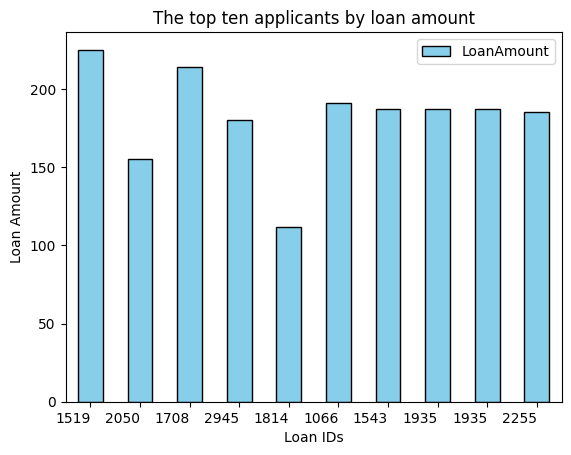

In [ ]:
value=cleaned_df.sort_values(by='ApplicantIncome', ascending=False)
top_applicants=value.iloc[0:10]
print(top_applicants)

top_applicants.plot(kind='bar', x='Loan_ID', y='LoanAmount', color='skyblue', edgecolor='black')
plt.xticks(rotation=360, ha='right')
plt.xlabel('Loan IDs')
plt.ylabel('Loan Amount')
plt.title('The top ten applicants by loan amount')

# Show the plot
plt.show()




The distribution of properties (rural, urban etc) of all loan applicants, shown in an
appropriate chart.

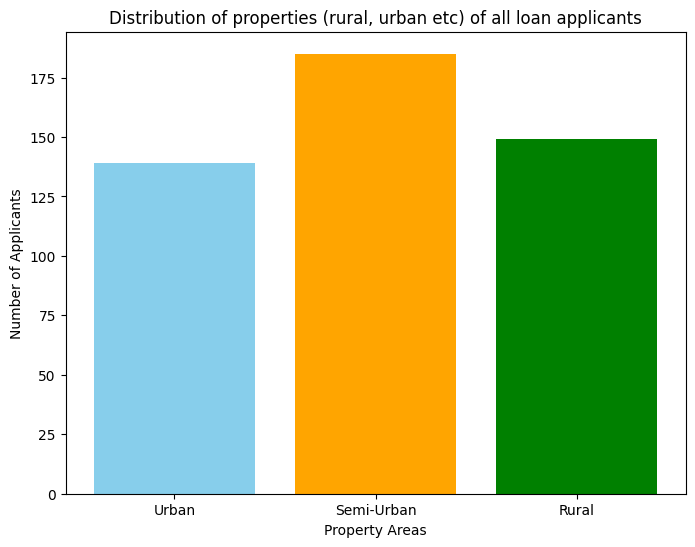

In [ ]:
total_urban= cleaned_df.loc[cleaned_df['Property_Area']==1]
total_semi_urban= cleaned_df.loc[cleaned_df['Property_Area']==2]
total_rural= cleaned_df.loc[cleaned_df['Property_Area']==3]


# all property areas
property_area = ['Urban', 'Semi-Urban', 'Rural']

#number of applicants
values=[len(total_urban),len(total_semi_urban),len(total_rural)]


# Set up the plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.xlabel('Property Areas')  # X-axis label
plt.ylabel('Number of Applicants')  # Y-axis label
plt.title('Distribution of properties (rural, urban etc) of all loan applicants')  # Plot title

# Plot the bars
plt.bar(property_area, values, color=['skyblue', 'orange', 'green'])

# Show the plot
plt.show()


# **STEP 5: TEST CASE**

We are running a basic test case on dataframe to check if the data is valid.

In [ ]:


def validate_data(df):
    # Check if DataFrame is not empty
    if df.empty:
        return False

    # Check for missing values
    if df.isnull().any().any():
        return False

    # Check if all columns are present
    expected_columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
    if not all(col in df.columns for col in expected_columns):
        return False


    return True


answer=validate_data(final_df)
print(answer)


True


# **STEP 6: FUTURE RECOMMENDATION**

First we will create a heatmap to identify the relations among columns/attributes. The values as closer to 1 will have higher correlation and values closer to 0 have lesser correlation

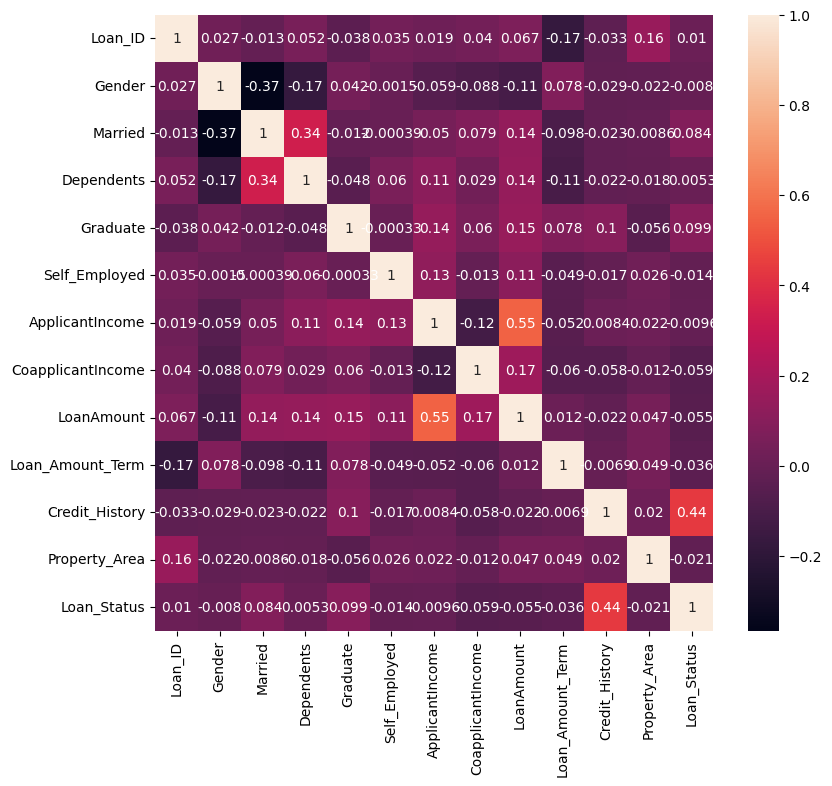

In [ ]:
plt.figure(figsize=(9, 8))
matrix = final_df.corr()
sns.heatmap(matrix, annot=True)
plt.show()

As we can see that these attributes are strongly correlated to each other
1. Credit_History & Loan_Status
2. Loan_Amount & ApplicantIncome
3. Dependents & Married

We will do some statistics and calculate Pearson Coorelation Coefficient. It tells us about the linear relationship between attributes. The higher the relation, value will be closer to 1 and lower the relation, value will be closer to -1. It is calculated by the formula:

$r = \frac{{\sum (x_i - \bar{x})(y_i - \bar{y})}}{{\sqrt{{\sum (x_i - \bar{x})^2} \cdot \sum (y_i - \bar{y})^2}}}$
where,
$x_i \text{ and } y_i \text{ are individual observations of the two variables.} \\
\bar{x} \text{ and } \bar{y} \text{ are the means of the two variables.} \\
\sum \text{ represents summation over all observations.}$







In [ ]:
import scipy.stats
result1= scipy.stats.linregress(cleaned_df['Credit_History'], cleaned_df['Loan_Status'])
print("Pearson coefficient of Credit History & Loan Status:",scipy.stats.pearsonr(cleaned_df['Credit_History'], cleaned_df['Loan_Status']))

result2= scipy.stats.linregress(cleaned_df['LoanAmount'], cleaned_df['ApplicantIncome'])
print("Pearson coefficient of Loan Amount & Applicant Income:",scipy.stats.pearsonr(cleaned_df['LoanAmount'], cleaned_df['ApplicantIncome']))

result3= scipy.stats.linregress(cleaned_df['Dependents'], cleaned_df['Married'])
print("Pearson coefficient of Dependents & Married:",scipy.stats.pearsonr(cleaned_df['Dependents'], cleaned_df['Married']))

Pearson coefficient of Credit History & Loan Status: PearsonRResult(statistic=0.46634205419952973, pvalue=6.487743778078063e-27)
Pearson coefficient of Loan Amount & Applicant Income: PearsonRResult(statistic=0.4588782613137727, pvalue=5.218909977766785e-26)
Pearson coefficient of Dependents & Married: PearsonRResult(statistic=0.3276634558754216, pvalue=2.6689579783497935e-13)


As all the values are positive and closer to 1 then the most suitable model will be Decision Tree for this case.